In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Clustering algorithm
from sklearn.cluster import AgglomerativeClustering

# Rand Index
from sklearn.metrics.cluster import rand_score

# Encode labels
from sklearn import preprocessing

# Confusion Matrix
from sklearn.metrics import confusion_matrix

In [320]:
#  Рабочая папка
import os
os.chdir("C:/Users/Екатерина/Desktop/my fale/учеба/4 курс/Проекты аналитики данных/Кластерный анализ")

In [321]:
#  Импорт данных
df = pd.read_csv("bank.csv", sep=";",  decimal=",")

In [322]:
df.head()

,age,job,marital,education,default,balance,housing,loan,y
0,30,unemployed,married,primary,no,1787,no,no,no
1,33,services,married,secondary,no,4789,yes,yes,no
2,35,management,single,tertiary,no,1350,yes,no,no
3,30,management,married,tertiary,no,1476,yes,yes,no
4,59,blue-collar,married,secondary,no,0,yes,no,no


In [323]:
print(df)

     age          job  marital  education default  balance housing loan   y
0     30   unemployed  married    primary      no     1787      no   no  no
1     33     services  married  secondary      no     4789     yes  yes  no
2     35   management   single   tertiary      no     1350     yes   no  no
3     30   management  married   tertiary      no     1476     yes  yes  no
4     59  blue-collar  married  secondary      no        0     yes   no  no
..   ...          ...      ...        ...     ...      ...     ...  ...  ..
393   59    housemaid  married    primary      no        0      no   no  no
394   38  blue-collar  married  secondary      no     1370     yes   no  no
395   58   management  married  secondary      no       37      no   no  no
396   34   management   single   tertiary      no      673     yes  yes  no
397   40     services  married  secondary      no     -342     yes   no  no

[398 rows x 9 columns]


In [324]:
#удаляем строки, содержащие нулевые значения
df=df.dropna()
df

,age,job,marital,education,default,balance,housing,loan,y
0,30,unemployed,married,primary,no,1787,no,no,no
1,33,services,married,secondary,no,4789,yes,yes,no
2,35,management,single,tertiary,no,1350,yes,no,no
3,30,management,married,tertiary,no,1476,yes,yes,no
4,59,blue-collar,married,secondary,no,0,yes,no,no
...,...,...,...,...,...,...,...,...,...
393,59,housemaid,married,primary,no,0,no,no,no
394,38,blue-collar,married,secondary,no,1370,yes,no,no
395,58,management,married,secondary,no,37,no,no,no
396,34,management,single,tertiary,no,673,yes,yes,no


In [325]:
df.describe()

,age,balance
count,398.000000,398.000000
mean,40.625628,1603.168342
std,10.290151,3006.880560
min,20.000000,-1680.000000
25%,33.000000,90.000000
50%,38.000000,462.000000
75%,48.000000,1789.250000
max,78.000000,26965.000000


### Стандартизация
StandardScaler -- приведение к нулевому среднему и единичной дисперсии.
MinMaxScaler -- приведение данных к отрезку [0, 1].
MaxAbsScaler -- приведение к [-1, 1] (рекомендуется для разреженных данных).

In [326]:
original = df.copy()

In [327]:
# Стандартизация переменных

from sklearn.preprocessing import scale,RobustScaler,StandardScaler, MinMaxScaler
scaler = preprocessing.MinMaxScaler()
scaler.fit(original.select_dtypes(include='number'))
numerical_data1 = scaler.transform(original.select_dtypes(include='number'))
#numerical_data1 = pd.DataFrame(numerical_data1, index=df.index, columns=['age_st','balance_st'])
#df = pd.concat([df, numerical_data1], axis = 1)

df1 = original
original[['age', 'balance']] = numerical_data1
df1

,age,job,marital,education,default,balance,housing,loan,y
0,0.172414,unemployed,married,primary,no,0.121033,no,no,no
1,0.224138,services,married,secondary,no,0.225833,yes,yes,no
2,0.258621,management,single,tertiary,no,0.105778,yes,no,no
3,0.172414,management,married,tertiary,no,0.110176,yes,yes,no
4,0.672414,blue-collar,married,secondary,no,0.058649,yes,no,no
...,...,...,...,...,...,...,...,...,...
393,0.672414,housemaid,married,primary,no,0.058649,no,no,no
394,0.310345,blue-collar,married,secondary,no,0.106476,yes,no,no
395,0.655172,management,married,secondary,no,0.059941,no,no,no
396,0.241379,management,single,tertiary,no,0.082143,yes,yes,no


In [328]:
df

,age,job,marital,education,default,balance,housing,loan,y
0,30,unemployed,married,primary,no,1787,no,no,no
1,33,services,married,secondary,no,4789,yes,yes,no
2,35,management,single,tertiary,no,1350,yes,no,no
3,30,management,married,tertiary,no,1476,yes,yes,no
4,59,blue-collar,married,secondary,no,0,yes,no,no
...,...,...,...,...,...,...,...,...,...
393,59,housemaid,married,primary,no,0,no,no,no
394,38,blue-collar,married,secondary,no,1370,yes,no,no
395,58,management,married,secondary,no,37,no,no,no
396,34,management,single,tertiary,no,673,yes,yes,no


### Поработаем с категориальными переменными

In [329]:
df1.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
y             object
dtype: object

Категориальные переменные - это переменные с типом object

In [330]:
df1.nunique()

age           48
job           12
marital        3
education      4
default        2
balance      343
housing        2
loan           2
y              2
dtype: int64

У нас нет столбцов только с одним уникальным значением, поэтому всё оставляем

Далее делаем Dummy-кодирование, которое может быть реализовано как с помощью sklearn.preprocessing.OneHotEncoder, так и бинарными переменнами. Ниже представлен вариант кодирования колонки marital и так нужно проделать с остальными, но я буду делать немного по-другому

In [49]:
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder(sparse=False)
#new_ohe_features = ohe.fit_transform(df.marital.values.reshape(-1,1))
#tmp = pd.DataFrame(new_ohe_features, columns=['marital='+str(i) for i in range(new_ohe_features.shape[1])])
#df = pd.concat([df, tmp], axis = 1)
#df

D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,job,marital,education,default,balance,housing,loan,y,marital=0,marital=1,marital=2
0,30,unemployed,married,primary,no,1787,no,no,no,0.0,1.0,0.0
1,33,services,married,secondary,no,4789,yes,yes,no,0.0,1.0,0.0
2,35,management,single,tertiary,no,1350,yes,no,no,0.0,0.0,1.0
3,30,management,married,tertiary,no,1476,yes,yes,no,0.0,1.0,0.0
4,59,blue-collar,married,secondary,no,0,yes,no,no,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
393,59,housemaid,married,primary,no,0,no,no,no,0.0,1.0,0.0
394,38,blue-collar,married,secondary,no,1370,yes,no,no,0.0,1.0,0.0
395,58,management,married,secondary,no,37,no,no,no,0.0,1.0,0.0
396,34,management,single,tertiary,no,673,yes,yes,no,0.0,0.0,1.0


In [331]:
from sklearn.preprocessing import OneHotEncoder
oenc=OneHotEncoder()
multiple_enc=oenc.fit_transform(df1[['job','marital','education','default','housing','loan','y']])# onehotencoding on 3 features

multiple_enc=multiple_enc.toarray()

#oenc.get_feature_names() use this method to get column names
multiple_enc=pd.DataFrame(multiple_enc,columns=oenc.get_feature_names_out())

df1=pd.concat([df1,multiple_enc],axis=1) # append to original dataframe

In [332]:
df1.head(5)

,age,job,marital,education,default,balance,housing,loan,y,job_admin,...,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
0,0.172414,unemployed,married,primary,no,0.121033,no,no,no,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.224138,services,married,secondary,no,0.225833,yes,yes,no,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.258621,management,single,tertiary,no,0.105778,yes,no,no,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.172414,management,married,tertiary,no,0.110176,yes,yes,no,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.672414,blue-collar,married,secondary,no,0.058649,yes,no,no,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [333]:
df1.drop(['job','marital','education','default','housing','loan','y'], axis= 1 , inplace= True )
df1.head(5)

,age,balance,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
0,0.172414,0.121033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.224138,0.225833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.258621,0.105778,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.172414,0.110176,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.672414,0.058649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


### Перекодирование бинарных переменных
Можно перекодировать как бинарные переменные по коду ниже, но в дальнейшем будут проблемы тогда  с интерпретацией

In [230]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#df1['default'] = le.fit_transform(df1['default'])
#df1['loan'] = le.fit_transform(df1['loan'])
#df1['y'] = le.fit_transform(df1['y'])
#df1['housing'] = le.fit_transform(df1['housing'])
#df1

,age,default,balance,housing,loan,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,0.172414,0,0.121033,0,0,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.224138,0,0.225833,1,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.258621,0,0.105778,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.172414,0,0.110176,1,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.672414,0,0.058649,1,0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.672414,0,0.058649,0,0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
394,0.310345,0,0.106476,1,0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
395,0.655172,0,0.059941,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
396,0.241379,0,0.082143,1,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Есть ещё функция get_dummies (), для обработки категориальных переменных

In [17]:
#df = pd.get_dummies(df[['default','housing','loan','y']])

,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
0,1,0,1,0,1,0,1,0
1,1,0,0,1,0,1,1,0
2,1,0,0,1,1,0,1,0
3,1,0,0,1,0,1,1,0
4,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...
393,1,0,1,0,1,0,1,0
394,1,0,0,1,1,0,1,0
395,1,0,1,0,1,0,1,0
396,1,0,0,1,0,1,1,0


In [68]:
!pip install gower

In [334]:
import gower

distance_matrix = gower.gower_matrix(df1)

distance_matrix
#is a measure to find the similarity between two rows of a dataset consisting 
#of mixed type attributes. It uses the concept of Manhattan distance
#for continuous variables and dice distance for measuring similarity between
#Binary variables.

array([[0.        , 0.28125945, 0.27936077, ..., 0.15668453, 0.34854674,
        0.21540473],
       [0.28125945, 0.        , 0.281191  , ..., 0.22748025, 0.21244591,
        0.07930391],
       [0.27936077, 0.281191  , 0.        , ..., 0.22215134, 0.07037502,
        0.21190603],
       ...,
       [0.15668453, 0.22748025, 0.22215134, ..., 0.        , 0.29089642,
        0.14908881],
       [0.34854674, 0.21244591, 0.07037502, ..., 0.29089642, 0.        ,
        0.2806511 ],
       [0.21540473, 0.07930391, 0.21190603, ..., 0.14908881, 0.2806511 ,
        0.        ]], dtype=float32)

# Иерархическая кластеризация


In [335]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

C:\Users\Екатерина\AppData\Local\Temp\ipykernel_9704\2540818648.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(distance_matrix, 'ward', 'euclidean')


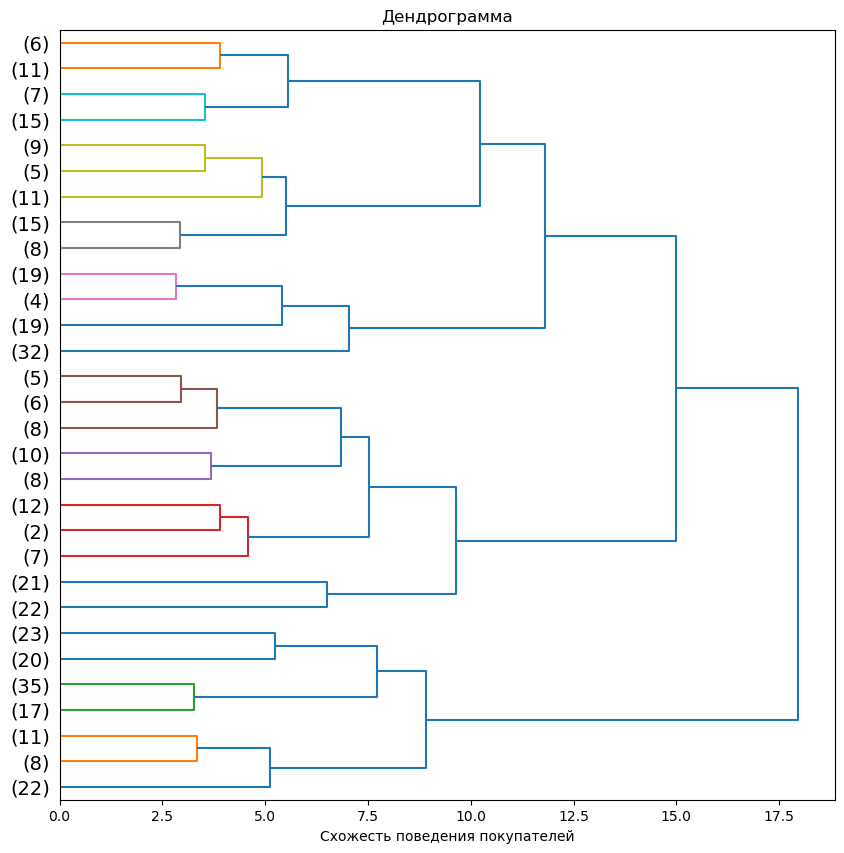

In [336]:
#  кластерный анализ

link = linkage(distance_matrix, 'ward', 'euclidean')
#link = linkage(X, 'single','euclidean')
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.set_xlabel('Схожесть поведения покупателей')

ax1.set_title('Дендрограмма')

dn = dendrogram(link,
                leaf_font_size = 14,
                # при расстоянии, большем 1.5, разделяем на кластеры
                color_threshold=5,
                # опция для красивого отображения слишком ветвистой дендрограммы
                truncate_mode='lastp',
                leaf_rotation=0.,
                orientation = "right")

Text(25, 8.5, '7 clusters')

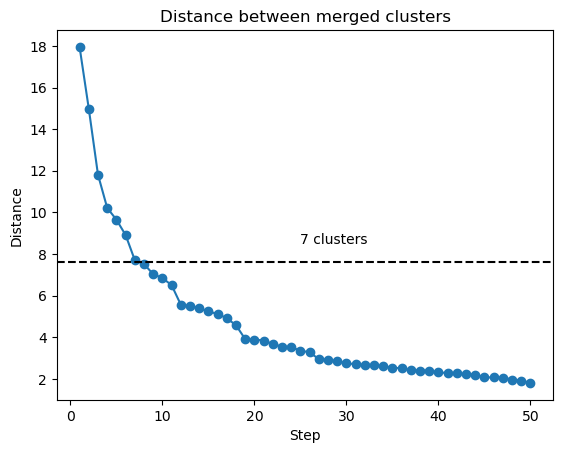

In [386]:
dist = link[:, 2]
#dist_rev = dist[::-1]
dist_rev = dist[::-1][:50]
#idxs = range(1, len(dist) + 1)
idxs = range(1, 51)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(7.6, c='k', linestyle='dashed')
plt.text(25, 8.5, '7 clusters')

In [387]:
# Останавливаем объединение, если расстояние между кластерами превышает 6
df1['cluster'] = fcluster(link, 8, criterion='distance')
df1.groupby('cluster').mean()

,age,balance,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
cluster,,,,,,,,,,,,,,,,,,,,,
1,0.330109,0.124014,0.170732,0.317073,0.000000,0.024390,0.073171,0.048780,0.000000,0.170732,...,0.000000,0.146341,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
2,0.339564,0.093025,0.168421,0.326316,0.031579,0.010526,0.126316,0.031579,0.052632,0.063158,...,0.210526,0.031579,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
3,0.275862,0.132434,0.046512,0.000000,0.023256,0.000000,0.627907,0.000000,0.023256,0.023256,...,0.976744,0.023256,1.000000,0.000000,0.511628,0.488372,1.000000,0.000000,1.000000,0.000000
4,0.370987,0.119859,0.068966,0.086207,0.068966,0.017241,0.379310,0.086207,0.051724,0.017241,...,0.672414,0.051724,0.896552,0.103448,0.448276,0.551724,0.672414,0.327586,0.396552,0.603448
5,0.464585,0.149904,0.040541,0.216216,0.054054,0.067568,0.216216,0.081081,0.067568,0.054054,...,0.256757,0.040541,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
6,0.273348,0.095785,0.104167,0.166667,0.000000,0.000000,0.041667,0.020833,0.062500,0.125000,...,0.000000,0.000000,0.958333,0.041667,1.000000,0.000000,0.750000,0.250000,0.750000,0.250000
7,0.381079,0.086104,0.230769,0.282051,0.025641,0.000000,0.051282,0.051282,0.051282,0.102564,...,0.000000,0.000000,0.974359,0.025641,0.358974,0.641026,0.000000,1.000000,1.000000,0.000000


In [388]:
#  Выведем состав каждого кластера
df1['cluster'].sort_values()

51     1
208    1
35     1
292    1
196    1
      ..
361    7
68     7
366    7
59     7
144    7
Name: cluster, Length: 398, dtype: int32

In [389]:
from sklearn.metrics import silhouette_score

In [390]:
# Подтверждаем в выборе оптимального количества кластеров
labels = df1['cluster']
data = df1
silhouette_avg = silhouette_score(data, labels)

In [391]:
print("Silhouette Score:", silhouette_avg)
#Лучшее значение — 1, худшее — -1. Значения около 0 указывают на 
#перекрывающиеся кластеры. Отрицательные значения обычно указывают на то, 
#что образец был отнесен к неправильному кластеру, поскольку другой 
#кластер более похож.

Silhouette Score: 0.25579216711256586


В данном месте я пыталась подобрать оптимальное количество кластеров по silhouette_score. Проанализировав каменистую осыпь, я бы сказала, что нужно выбрать между 6 и 7 кластерами. Подтвержу с помощью оценки силуэта. 6 clusters - 0.254, 5 clusters - 0.245, 7 clusters - 0.255
Ссылаясь на оценку силуета, скажем что 7 кластеров - самое оптимальное число

### Интерпретация полученных результатов

In [401]:
pd.set_option('display.max_columns', None)

In [402]:
df1['cluster'] = fcluster(link, 8, criterion='distance')
A = df[['age', 'balance']]
df1[['age', 'balance']] = A
df1.groupby('cluster').mean()

,age,balance,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,39.146341,1872.390244,0.170732,0.317073,0.000000,0.024390,0.073171,0.048780,0.000000,0.170732,0.000000,0.195122,0.000000,0.000000,0.365854,0.000000,0.634146,0.121951,0.731707,0.000000,0.146341,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
2,39.694737,984.694737,0.168421,0.326316,0.031579,0.010526,0.126316,0.031579,0.052632,0.063158,0.000000,0.168421,0.021053,0.000000,0.000000,1.000000,0.000000,0.210526,0.547368,0.210526,0.031579,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
3,36.000000,2113.581395,0.046512,0.000000,0.023256,0.000000,0.627907,0.000000,0.023256,0.023256,0.000000,0.232558,0.000000,0.023256,0.162791,0.000000,0.837209,0.000000,0.000000,0.976744,0.023256,1.000000,0.000000,0.511628,0.488372,1.000000,0.000000,1.000000,0.000000
4,41.517241,1753.362069,0.068966,0.086207,0.068966,0.017241,0.379310,0.086207,0.051724,0.017241,0.017241,0.155172,0.051724,0.000000,0.258621,0.413793,0.327586,0.155172,0.120690,0.672414,0.051724,0.896552,0.103448,0.448276,0.551724,0.672414,0.327586,0.396552,0.603448
5,46.945946,2613.986486,0.040541,0.216216,0.054054,0.067568,0.216216,0.081081,0.067568,0.054054,0.000000,0.162162,0.013514,0.027027,0.054054,0.945946,0.000000,0.270270,0.432432,0.256757,0.040541,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
6,35.854167,1063.770833,0.104167,0.166667,0.000000,0.000000,0.041667,0.020833,0.062500,0.125000,0.104167,0.312500,0.062500,0.000000,0.208333,0.104167,0.687500,0.000000,1.000000,0.000000,0.000000,0.958333,0.041667,1.000000,0.000000,0.750000,0.250000,0.750000,0.250000
7,42.102564,786.461538,0.230769,0.282051,0.025641,0.000000,0.051282,0.051282,0.051282,0.102564,0.000000,0.205128,0.000000,0.000000,0.025641,0.846154,0.128205,0.153846,0.846154,0.000000,0.000000,0.974359,0.025641,0.358974,0.641026,0.000000,1.000000,1.000000,0.000000


1-й кластер - чаще всего разнорабочие, в разводе или одинокие, со средним образованием, без дефолтов, с собственным жильем, могут не отдать кредит, с займами
2-й кластер - разнорабочие, женатые, преимущественно с средним образованием, без дефолтов, с собственным жильем, могут не отдать, без займов
3-й кластер - молодая группа, с большим балансом, в большинстве менеджеры и одинокие, с высшим образованием, без дефолтов, но в большинстве снимают жилье, не отдадут, без займов
4-й кластер - разбросанная по деятельности группа, в большинстве менеджеры, но занимаются практически всем, то же самое касается семейного положения, практически одинаковый процент одиноких, женатых и разведенных, в большинстве с высшим образованием и собственным жильем и вероятно отдадут кредит, без займов
5-й кластер - самый взрослый кластер, с самым большим балансом на счету, также нет преимущественно одной специальности у группы, женатые, с средним образованием, без дефолтов, без собственного жилья и не вернут кредит, без заемов
6-й кластер - самый молодой кластер, в большинстве технические специальности, одинокие, с начальным образованием, без дефолтов, без собственного жилья, вероятно не вернут долг, без займов
7-й кластер - с самым маленьким балансом на счету, вторые по возрасту, либо администраторы, либо разнорабочие, либо технической специальности, женаты, с среднем обсразованием, без дефолтов, с собственным жильем, не вернут кредит, с займов

#### Можно попробовать посмотреть другие метрики растояния

C:\Users\Екатерина\AppData\Local\Temp\ipykernel_9704\3088748950.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(distance_matrix, 'single','euclidean')


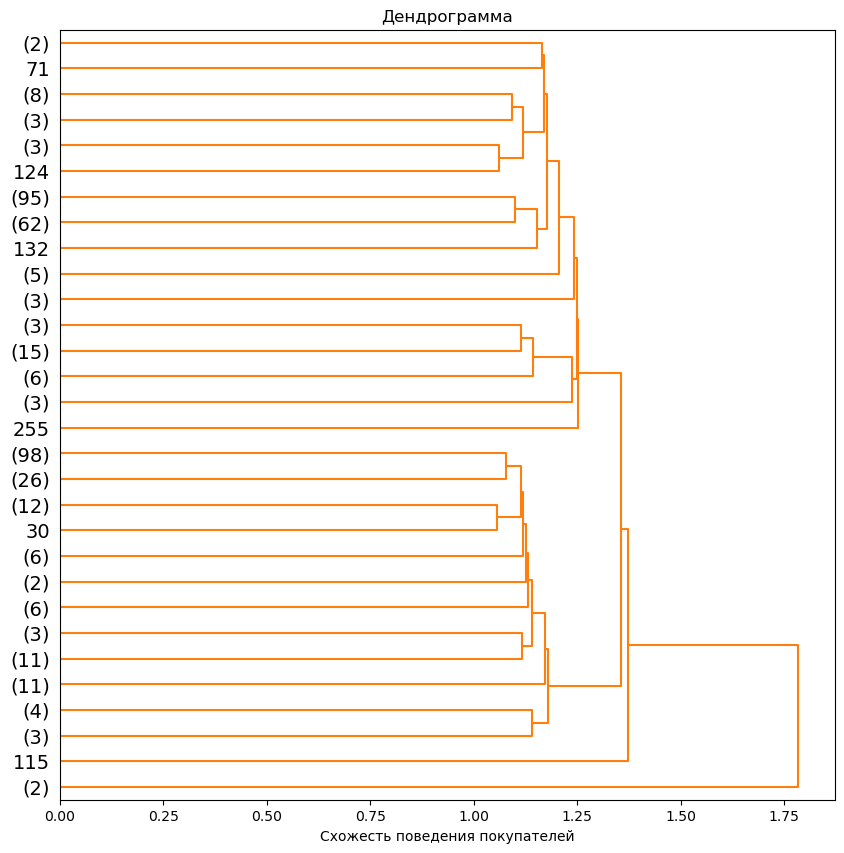

In [414]:
link = linkage(distance_matrix, 'single','euclidean')
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.set_xlabel('Схожесть поведения покупателей')

ax1.set_title('Дендрограмма')

dn = dendrogram(link,
                leaf_font_size = 14,
                # при расстоянии, большем 1.5, разделяем на кластеры
                color_threshold=5,
                # опция для красивого отображения слишком ветвистой дендрограммы
                truncate_mode='lastp',
                leaf_rotation=0.,
                orientation = "right")

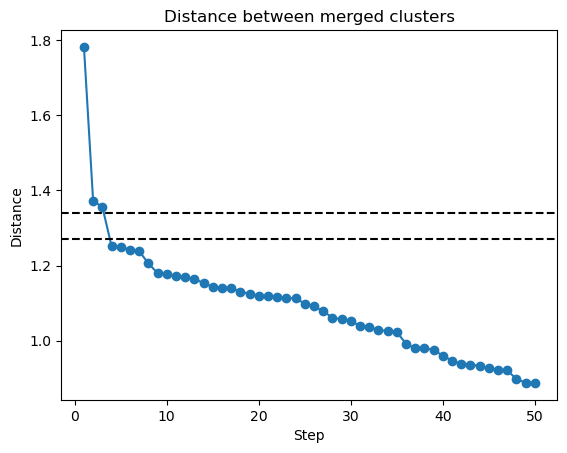

In [415]:
dist = link[:, 2]
#dist_rev = dist[::-1]
dist_rev = dist[::-1][:50]
#idxs = range(1, len(dist) + 1)
idxs = range(1, 51)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(1.27, c='k', linestyle='dashed')
plt.axhline(1.34, c='k', linestyle='dashed')


In [416]:
df1['cluster'] = fcluster(link, 1.3, criterion='distance')
A = df[['age', 'balance']]
df1[['age', 'balance']] = A
df1.groupby('cluster').mean()

,age,balance,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,38.500000,-549.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.0,0.000000,1.000000,1.000000,0.000000
2,42.256831,1934.688525,0.060109,0.169399,0.032787,0.032787,0.251366,0.060109,0.065574,0.060109,0.032787,0.185792,0.032787,0.016393,0.153005,0.535519,0.311475,0.153005,0.497268,0.327869,0.021858,0.983607,0.016393,1.0,0.0,0.825137,0.174863,0.841530,0.158470
3,39.311321,1342.481132,0.165094,0.250000,0.028302,0.009434,0.179245,0.037736,0.033019,0.084906,0.000000,0.202830,0.009434,0.000000,0.108491,0.608491,0.283019,0.141509,0.518868,0.283019,0.056604,0.981132,0.018868,0.0,1.0,0.834906,0.165094,0.919811,0.080189
4,25.000000,505.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.0,0.000000,1.000000,0.000000,1.000000


In [417]:
# Подтверждаем в выборе оптимального количества кластеров
labels = df1['cluster']
data = df1
silhouette_avg = silhouette_score(data, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.5783930386121913


In [418]:
#  Выведем состав каждого кластера
df1['cluster'].sort_values()

152    1
48     1
0      2
213    2
214    2
      ..
233    3
80     3
237    3
397    3
115    4
Name: cluster, Length: 398, dtype: int32

1 кластер - отрицательный баланс, либо предприниматели, либо безработные, либо в разводе, либо одинокие, с начальным образованием, с дефолтом и собственным домом, с займами, не вернут
2 кластер - самая взрослая группа, понемногу во всех специальностях, в большинстве женаты, с средним образованием, без дефолтов, без собственного жилья, вероятно не вернут, без займов
3 кластер - разнорабочие, женатые, с средним образованием, без дефолта, с собственным жильем, не вернут, без займов
4 кластер - самая молодая группа, технической специальности, одинокие, без дефолта, без собственного жилья, вернут, с займами

Но по оценке ситуэта видим, что у нас отрицательное значение, что указывают на то, что образец был отнесен к неправильному кластеру. Первое разделение на кластеры получилось более оптимальным.

# Кластеризация методом K-means

In [433]:
from sklearn.cluster import KMeans
d_f = pd.read_csv("bank.csv", sep = ";", decimal = ",")
d_f.head()

,age,job,marital,education,default,balance,housing,loan,y
0,30,unemployed,married,primary,no,1787,no,no,no
1,33,services,married,secondary,no,4789,yes,yes,no
2,35,management,single,tertiary,no,1350,yes,no,no
3,30,management,married,tertiary,no,1476,yes,yes,no
4,59,blue-collar,married,secondary,no,0,yes,no,no


Стандартизируем данные как делали выше

In [434]:
original_2 = d_f.copy()

In [435]:
# Стандартизация переменных

from sklearn.preprocessing import scale,RobustScaler,StandardScaler, MinMaxScaler
scaler = preprocessing.MinMaxScaler()
scaler.fit(original_2.select_dtypes(include='number'))
numerical_data1 = scaler.transform(original_2.select_dtypes(include='number'))
#numerical_data1 = pd.DataFrame(numerical_data1, index=df.index, columns=['age_st','balance_st'])
#df = pd.concat([df, numerical_data1], axis = 1)

d_f1 = original_2
original_2[['age', 'balance']] = numerical_data1
d_f1

,age,job,marital,education,default,balance,housing,loan,y
0,0.172414,unemployed,married,primary,no,0.121033,no,no,no
1,0.224138,services,married,secondary,no,0.225833,yes,yes,no
2,0.258621,management,single,tertiary,no,0.105778,yes,no,no
3,0.172414,management,married,tertiary,no,0.110176,yes,yes,no
4,0.672414,blue-collar,married,secondary,no,0.058649,yes,no,no
...,...,...,...,...,...,...,...,...,...
393,0.672414,housemaid,married,primary,no,0.058649,no,no,no
394,0.310345,blue-collar,married,secondary,no,0.106476,yes,no,no
395,0.655172,management,married,secondary,no,0.059941,no,no,no
396,0.241379,management,single,tertiary,no,0.082143,yes,yes,no


In [436]:
from sklearn.preprocessing import OneHotEncoder
oenc=OneHotEncoder()
multiple_enc=oenc.fit_transform(d_f1[['job','marital','education','default','housing','loan','y']])# onehotencoding on 3 features

multiple_enc=multiple_enc.toarray()

#oenc.get_feature_names() use this method to get column names
multiple_enc=pd.DataFrame(multiple_enc,columns=oenc.get_feature_names_out())

d_f1=pd.concat([d_f1,multiple_enc],axis=1) # append to original dataframe

In [437]:
d_f1.drop(['job','marital','education','default','housing','loan','y'], axis= 1 , inplace= True )
d_f1.head(5)

,age,balance,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
0,0.172414,0.121033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.224138,0.225833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.258621,0.105778,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.172414,0.110176,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.672414,0.058649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
df1 = df.drop(columns = ['cluster'],axis = 1)
df1

In [438]:
from sklearn.cluster import KMeans

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

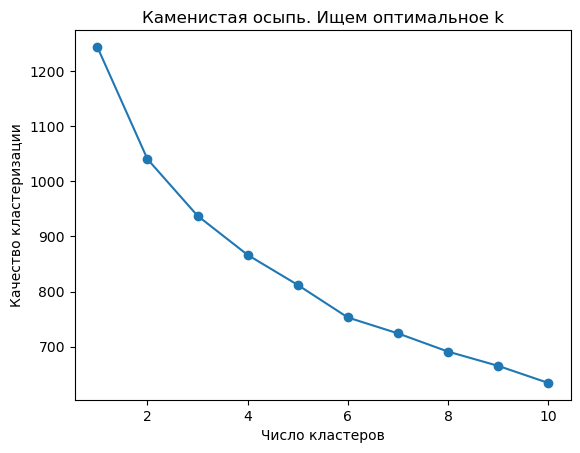

In [439]:
# Строим 10 моделей с числом кластеров от 1 до 10. 
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42, n_init=10, verbose=0).fit(d_f1) for k in K]

#  Качество кластеризации вычисляется в model.inertia_
dist = [model.inertia_ for model in models]

# Строим график каменистая осыпь
plt.plot(K, dist, marker='o')
# Добавляем на график текст
plt.xlabel('Число кластеров')
plt.ylabel('Качество кластеризации')
plt.title('Каменистая осыпь. Ищем оптимальное k')
plt.show()

По графику достаточно проблематично определить количесво кластеров. Посмотрим уже по ходу постояния, я думаю их 4 или 5.

In [469]:
#  максимальное число итераций 
max_iter_1 = 300
model = KMeans(n_clusters=4, random_state=25, max_iter=max_iter_1, n_init=10, 
               verbose=0, tol=0.0001 )
# Кластеризация данных из таблицы d_f1
model.fit(d_f1)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, n_init=10, random_state=25)

In [470]:
#  Сколько итераций потребовалось процедуре?
model.n_iter_

3

In [471]:
d_f1['cluster_kmeans'] = model.labels_
d_f1['cluster_kmeans'].sort_values()

198    0
125    0
315    0
129    0
313    0
      ..
326    3
115    3
279    3
187    3
346    3
Name: cluster_kmeans, Length: 398, dtype: int32

In [472]:
labels = d_f1['cluster_kmeans']
data = d_f1
silhouette_avg = silhouette_score(data, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.2399509800426977


In [473]:
#  максимальное число итераций 
max_iter_1 = 300
model = KMeans(n_clusters=5, random_state=25, max_iter=max_iter_1, n_init=10, 
               verbose=0, tol=0.0001 )
# Кластеризация данных из таблицы d_f1
model.fit(d_f1)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5, n_init=10, random_state=25)

In [474]:
model.n_iter_

4

In [475]:
d_f1['cluster_kmeans'] = model.labels_
d_f1['cluster_kmeans'].sort_values()

326    0
233    0
234    0
120    0
357    0
      ..
222    4
223    4
224    4
297    4
397    4
Name: cluster_kmeans, Length: 398, dtype: int32

In [476]:
labels = d_f1['cluster_kmeans']
data = d_f1
silhouette_avg = silhouette_score(data, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.2545923928299447


0.23 против 0.25 по оценке силуэта. Принимаем решение, что оптимальное количество кластеров 5

In [477]:
d_f1[['age', 'balance']] = d_f[['age', 'balance']]
d_f1.groupby('cluster_kmeans').mean()

,age,balance,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
cluster_kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,34.587500,1590.525000,0.187500,0.212500,0.012500,0.012500,0.025000,0.025000,0.037500,0.137500,0.062500,0.237500,0.050000,0.000000,0.125000,0.000000,0.875000,0.075000,0.900000,0.000000,0.025000,0.975000,0.025000,0.43750,0.56250,0.775000,0.225000,0.850000,0.150000
1,39.483871,1941.951613,0.016129,0.048387,0.064516,0.016129,0.596774,0.016129,0.080645,0.000000,0.016129,0.129032,0.000000,0.016129,0.177419,0.451613,0.370968,0.000000,0.000000,0.967742,0.032258,0.983871,0.016129,1.00000,0.00000,0.887097,0.112903,0.806452,0.193548
2,39.469697,1785.621212,0.106061,0.015152,0.045455,0.000000,0.454545,0.045455,0.045455,0.045455,0.000000,0.227273,0.015152,0.000000,0.166667,0.439394,0.393939,0.000000,0.000000,0.909091,0.090909,0.969697,0.030303,0.00000,1.00000,0.848485,0.151515,0.863636,0.136364
3,47.180328,2148.459016,0.114754,0.163934,0.032787,0.016393,0.098361,0.081967,0.049180,0.114754,0.000000,0.295082,0.000000,0.032787,0.180328,0.819672,0.000000,0.000000,0.967213,0.000000,0.032787,0.983607,0.016393,1.00000,0.00000,0.803279,0.196721,0.901639,0.098361
4,42.410853,1096.984496,0.124031,0.410853,0.023256,0.038760,0.069767,0.062016,0.038760,0.062016,0.000000,0.139535,0.031008,0.000000,0.069767,0.930233,0.000000,0.418605,0.550388,0.000000,0.031008,0.976744,0.023256,0.20155,0.79845,0.821705,0.178295,0.937984,0.062016


1 кластер - самая молодая группа, технической специальности, администраторы или рабочей специальности, одинокие, с средним образованием, с собственным жильем, без займов, не вернет
2 кластер - в большинстве менеджеры, женатые в большинстве, с высшим образованием, без дефолтов, без собственного жилья, без займов, не вернет
3 кластер - менеджеры или технической специальности, в большинстве женатые, с высшим образованием, без дефолтов, с собственным жильем, без займов, не вернет
4 кластер - самая взрослая группа, с самым большим балансом, по немного во всех специальностях, женатые, с средним образованием, без дефолтов, без собственного жилья, без займов, не вернет
5 кластер - с самым маленьким балансом, рабочей специальности, женатые, с средним образованием, без дефолтов, с собственным жильем, без займов, не вернет

 5 clusters - 0.245 при иерархической кластеризации и 0.25459 в k-means, поэтому как будто k-means очень хорошо справился, но в иерархической кластеризациии достаточно хорошо, что разбилось на большее количество кластеров, поэтому я предпочту результат получившийся в иерархическом кластерном анализе